In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


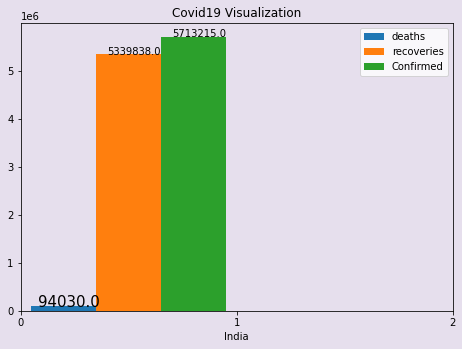

In [2]:
data = pd.read_csv('covid_19_data.csv')
df = pd.DataFrame(data)
df.rename(columns={ "ObservationDate":"timestamp","Province/State": "State", "Country/Region": "Country"}, inplace=True )
df.dropna(inplace=True)
city_index = df[df["Country"]== "India"].index.values
countries = df.groupby('Country')
confirmed = df.loc[city_index, "Confirmed"].values
deaths = df.loc[city_index, "Deaths"].values
recovered = df.loc[city_index, "Recovered"].values
x = np.arange(1)
bar = [ deaths.max(), recovered.max(), confirmed.max() ]
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
fig.set_facecolor("#e6dfed")
axes.set_title('Covid19 Visualization')
axes.set_xlabel("India")
axes.set_facecolor("#e6dfed")
axes.bar(x + 0.2,deaths.max(), width=0.3,label="deaths")
axes.bar(x + 0.5,recovered.max(),width=0.3, label="recoveries")
axes.bar(x + 0.8, confirmed.max(),width=0.3,label="Confirmed")
axes.set_xticks(np.arange(3))
axes.text(x + 0.08,deaths.max(),deaths.max(), fontsize = 15) 
axes.text(x + 0.4,recovered.max(),recovered.max()) 
axes.text(x + 0.7, confirmed.max(), confirmed.max()) 
axes.legend()
fig.savefig('covid19_visualization.png')


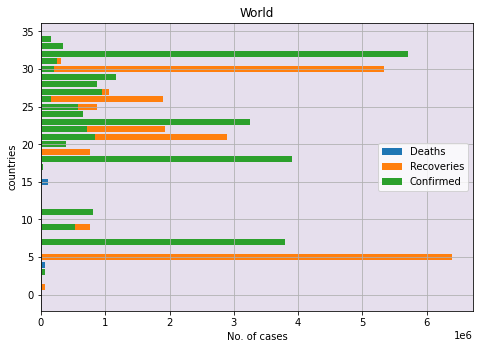

In [28]:
data = pd.read_csv('covid_19_data.csv')
df = pd.DataFrame(data)
df.rename(columns={ "ObservationDate":"timestamp","Province/State": "State", "Country/Region": "Country"}, inplace=True )
df.dropna(inplace=True)

countries = df["Country"].unique()
countries_len = np.arange(0,len(countries))

deaths = []
recoveries = []
confirmed = []
my_countries = []

for country in range(0,len(countries)):

    country_index = df[df["Country"] == countries[country]].index.values
    
    death = df.loc[country_index, "Deaths"].values
    recovery = df.loc[country_index, "Recovered"].values
    confirm = df.loc[country_index, "Confirmed"].values
    deaths.append(death.max())
    recoveries.append(recovery.max())
    confirmed.append(confirm.max())

fdf = pd.DataFrame({
    "Deaths": deaths,
    "Recoveries": recoveries,
    "Confirmed": confirmed
    })

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.set_title("World")
axes.set_ylabel("countries")
axes.set_xlabel("No. of cases")
axes.set_facecolor("#e6dfed")
axes.barh(countries_len, fdf["Deaths"], label="Deaths")
axes.barh(countries_len + 1, fdf["Recoveries"], label="Recoveries")
axes.barh(countries_len + 3, fdf["Confirmed"], label="Confirmed") 
axes.legend()
axes.grid()
fig.savefig('world_visualization.png')



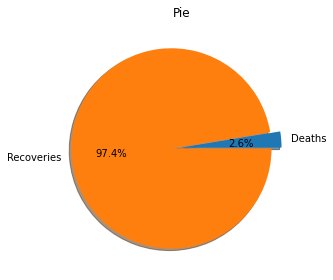

In [46]:
data = pd.read_csv('covid_19_data.csv')
df = pd.DataFrame(data)
df.rename(columns={ "ObservationDate":"timestamp","Province/State": "State", "Country/Region": "Country"}, inplace=True )
df.dropna(inplace=True)
countries = df["Country"].unique()
countries_len = np.arange(0,len(countries))
deaths = []
recoveries = []
confirmed = []
my_countries = []
for country in range(0,len(countries)):
    country_index = df[df["Country"] == countries[country]].index.values
    
    death = df.loc[country_index, "Deaths"].values
    recovery = df.loc[country_index, "Recovered"].values
    confirm = df.loc[country_index, "Confirmed"].values
    deaths.append(death.max())
    recoveries.append(recovery.max())
    confirmed.append(confirm.max())
    
fdf = pd.DataFrame({
    "Deaths": deaths,
    "Recoveries": recoveries,
    "Confirmed": confirmed
    })

bar = [ fdf["Deaths"].sum(), fdf["Recoveries"].sum() ]
plt.title("Pie")
plt.pie(bar, labels=[ "Deaths", "Recoveries"], explode=[0,0.1], shadow=True, autopct="%1.1f%%")
plt.tight_layout()
